# Wine Quality Dataset

## 1. Introduction

> The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

> The number of observations for each class is not balanced. There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:

> Fixed acidity.
Volatile acidity.
Citric acid.
Residual sugar.
Chlorides.
Free sulfur dioxide.
Total sulfur dioxide.
Density.
pH.
Sulphates.
Alcohol.
Quality (score between 0 and 10).

## 2. Loading the necessary libraries and datasets

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#ML imports
from sklearn.linear_model import LinearRegression

In [2]:
## Loading the dataset from github repo
url = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Wine-Quality-Dataset/winequality-white.csv'
df = pd.read_csv(url, delimiter= ';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 3. Performing the feature analysis

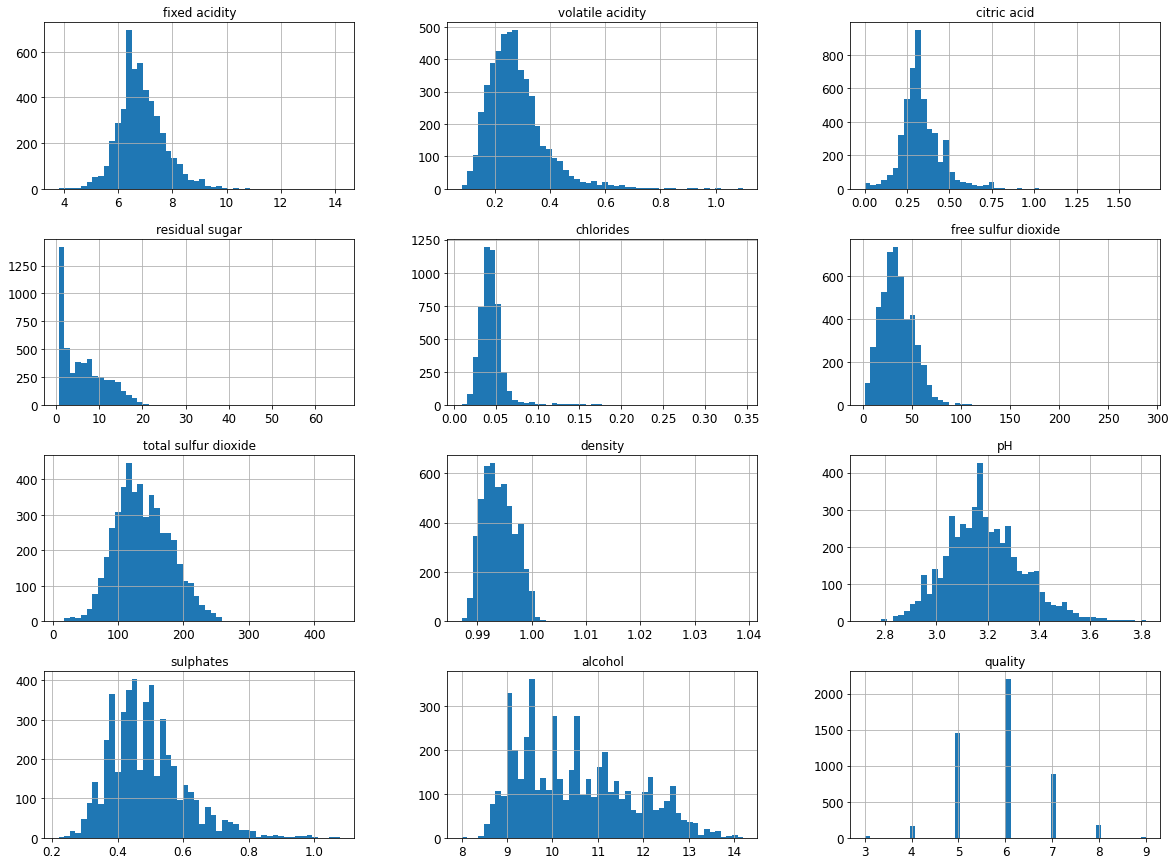

In [5]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

Inference : The feature alcohol looks to be in some realation quality

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4,6
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1,6
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4,5


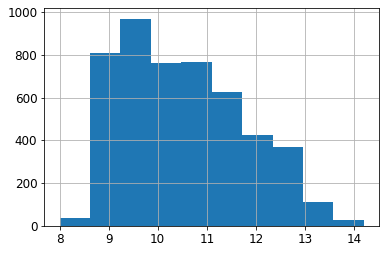

In [7]:
df.alcohol.hist();

In [8]:
df['alcohol_Category'] = pd.cut(df["alcohol"],
                               bins=[0, 8, 9, 10, 11, 12, 13, 14, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
df.alcohol_Category.value_counts()

3    1583
4    1252
5     850
6     609
2     500
7     100
8       2
1       2
Name: alcohol_Category, dtype: int64

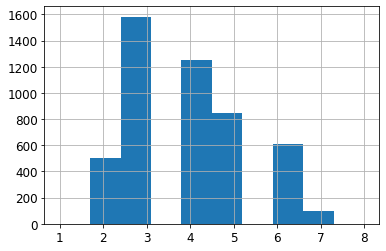

In [10]:
df.alcohol_Category.hist();

## 4. Train, Test and Split

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["alcohol_Category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [12]:
print('alcohol_Category spread in test data:\n', strat_test_set["alcohol_Category"].value_counts() / len(strat_test_set))
print()
print('alcohol_Category spread in train data:\n', strat_train_set["alcohol_Category"].value_counts() / len(strat_train_set))
print()
print('alcohol_Category spread in complete dataset:\n', df["alcohol_Category"].value_counts() / len(df))

alcohol_Category spread in test data:
 3    0.323469
4    0.256122
5    0.173469
6    0.124490
2    0.102041
7    0.020408
8    0.000000
1    0.000000
Name: alcohol_Category, dtype: float64

alcohol_Category spread in train data:
 3    0.323124
4    0.255487
5    0.173558
6    0.124298
2    0.102093
7    0.020419
8    0.000510
1    0.000510
Name: alcohol_Category, dtype: float64

alcohol_Category spread in complete dataset:
 3    0.323193
4    0.255615
5    0.173540
6    0.124336
2    0.102082
7    0.020416
8    0.000408
1    0.000408
Name: alcohol_Category, dtype: float64


In [13]:
## After the train, test, split we no longer needed the feature alcohol_Category
for set_ in (strat_train_set, strat_test_set):
    set_.drop("alcohol_Category", axis=1, inplace=True)

df_prepared = strat_train_set.drop('quality', axis =1)
df_labelled = strat_train_set['quality'].copy()
test_prepared = strat_test_set.drop('quality', axis =1)
test_labelled = strat_test_set['quality'].copy()

## Looking for co relation

In [14]:
corr_matrix = df.corr()

corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

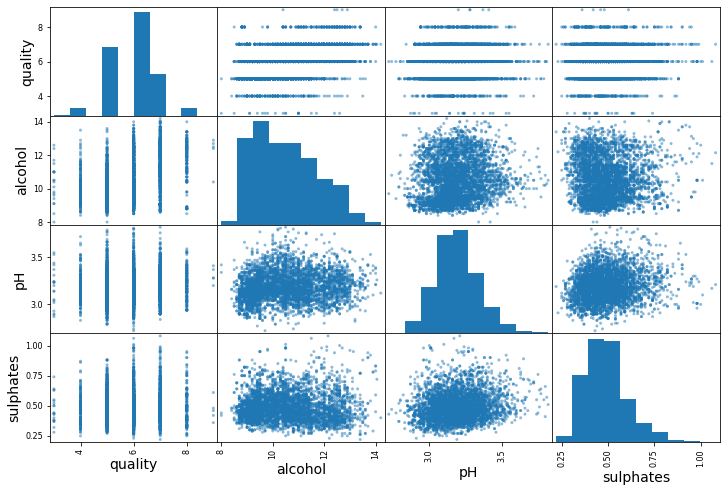

In [15]:
# from pandas.tools.plotting import scatter_matrix 
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "pH",
              "sulphates"]
scatter_matrix(df[attributes], figsize=(12, 8));


The above plot is not being very helpful in analysising the features

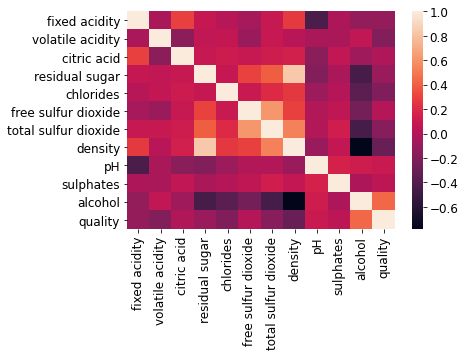

In [16]:
sns.heatmap(df.corr())
plt.show()

In [17]:
correlations = df.corr()['quality'].drop('quality')
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [18]:
features = get_features(0.05) 
print(features) 
x = df[features] 
y = df['quality']

['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


With the above result we conclude the feature 'citric acid' is least related to wine quality. Hence removing if from train and test sets

In [19]:
df_prepared = df_prepared[features]
test_prepared = test_prepared[features]

## Building the model

In [20]:
# fitting linear regression to training data
reg = LinearRegression().fit(df_prepared, df_labelled)
some_data = df_prepared.iloc[:5]
some_labels = df_labelled.iloc[:5]

print("Predictions:", reg.predict(some_data))
print(some_labels)
 
# this gives the coefficients of the 10 features selected above.  print(regressor.coef_)
print(reg.coef_)

Predictions: [6.21226441 6.34632759 6.05714212 5.56980253 5.64360547]
4143    6
2994    7
2904    7
2443    5
4690    6
Name: quality, dtype: int64
[ 7.51442951e-02 -2.04789085e+00  8.44858982e-02  6.56024488e-02
  7.03271729e-04 -1.49579661e+02  7.24145509e-01  5.73463111e-01
  2.03780760e-01]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Predictions = reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labelled, Predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(df_labelled, Predictions)
lin_mae

print('RMSE:',lin_rmse)
print('MAE:',lin_mae)

RMSE: 0.7551622507687118
MAE: 0.5873270740900106


Running the model on the test set

In [22]:
Predictions = reg.predict(test_prepared)
lin_mse = mean_squared_error(test_labelled, Predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(test_labelled, Predictions)
print('MAE:', lin_mae)
print('RMSE:', lin_rmse)

MAE: 0.5832897871736055
RMSE: 0.7406121541574052


In [23]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(reg.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.075144
volatile acidity        -2.047891
residual sugar           0.084486
chlorides                0.065602
total sulfur dioxide     0.000703
density               -149.579661
pH                       0.724146
sulphates                0.573463
alcohol                  0.203781


These numbers mean that holding all other features fixed, a 1 unit increase in pH will lead to an increase of 0.7 in quality of wine, and similarly for the other features.
Also holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of -2.04 in quality of wine, and similarly for the other features.